#### Import block

In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

from sklearn.linear_model import LinearRegression
import seaborn as sns

%matplotlib inline

In [6]:
# Check for available GPU.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
m = pd.read_csv('Sample_CLSTM_Dataset/train/meta.csv')
m

,Unnamed: 0,Lon,Lat,Date,features,labels
0,356962,-53.345535,-6.535028,2017-07-30,Sample_CLSTM_Dataset/train/features/356962.npy,Sample_CLSTM_Dataset/train/labels/356962.npy
1,546517,-47.329685,-8.260676,2017-08-20,Sample_CLSTM_Dataset/train/features/546517.npy,Sample_CLSTM_Dataset/train/labels/546517.npy
2,799359,-50.967861,-8.255809,2017-09-04,Sample_CLSTM_Dataset/train/features/799359.npy,Sample_CLSTM_Dataset/train/labels/799359.npy
3,714590,-66.144379,-12.624272,2017-08-31,Sample_CLSTM_Dataset/train/features/714590.npy,Sample_CLSTM_Dataset/train/labels/714590.npy
4,240012,-48.350338,-11.838207,2017-07-14,Sample_CLSTM_Dataset/train/features/240012.npy,Sample_CLSTM_Dataset/train/labels/240012.npy
...,...,...,...,...,...,...
6491,173827,-54.326607,-11.983384,2017-06-20,Sample_CLSTM_Dataset/train/features/173827.npy,Sample_CLSTM_Dataset/train/labels/173827.npy
6492,1377764,-47.425915,-7.486426,2017-09-26,Sample_CLSTM_Dataset/train/features/1377764.npy,Sample_CLSTM_Dataset/train/labels/1377764.npy
6493,1444041,-65.172768,-10.714162,2017-10-02,Sample_CLSTM_Dataset/train/features/1444041.npy,Sample_CLSTM_Dataset/train/labels/1444041.npy
6494,644793,-53.701656,-15.977278,2017-08-27,Sample_CLSTM_Dataset/train/features/644793.npy,Sample_CLSTM_Dataset/train/labels/644793.npy


#### Load data

In [8]:
# Data loaders.
batch_size = 64
meta_t = pd.read_csv('Sample_CLSTM_Dataset/train/meta.csv')
meta_v = pd.read_csv('Sample_CLSTM_Dataset/val/meta.csv')

In [44]:
# Trying new approach to build dataset.
x_train, y_train, x_val, y_val = [],[],[],[]

# Iterate over dataset.
for x in range(0,len(meta_t)):
    x_train.append(np.array([np.load(meta_t.iloc[x].features)[y].sum() for y in range(0,10)]))
    y_train.append(np.array(np.load(meta_t.iloc[x].labels).sum()))
for x in range(0,len(meta_v)):
    x_val.append(np.array([np.load(meta_v.iloc[x].features)[y].sum() for y in range(0,10)]))
    y_val.append(np.array(np.load(meta_v.iloc[x].labels).sum()))
    
# Stack layers.
x_train = np.stack(x_train)
y_train = np.stack(y_train)
x_val = np.stack(x_val)
y_val = np.stack(y_val)

#### Fitting a linear regression

In [46]:
model = LinearRegression().fit(x_train, y_train)

In [47]:
model.coef_

array([0.23985142, 0.13418945, 0.13995837, 0.06859357, 0.40433603,
       0.92500966, 0.19182384, 0.51730776, 0.29330125, 0.5119759 ])

In [63]:
x_df = pd.DataFrame(x_train)
x_df['target'] = pd.Series(y_train)
x_df['pred'] = model.predict(x_train)
x_df['err'] = x_df['pred'] - x_df['target']
x_df['sq_err'] = x_df['err'] ** 2
x_df

,0,1,2,3,4,5,6,7,8,9,target,pred,err,sq_err
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,23.0,10.0,23.0,27.086217,4.086217,16.697168
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,8.0,5.0,13.625951,8.625951,74.407030
2,2.0,0.0,1.0,9.0,12.0,1.0,2.0,2.0,16.0,21.0,94.0,30.302920,-63.697080,4057.318059
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,9.791454,9.791454,95.872569
4,0.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,9.863487,9.863487,97.288377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,14.0,0.0,21.0,7.0,19.0,20.0,33.0,31.0,12.0,26.0,160.0,78.583791,-81.416209,6628.599048
6492,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,4.0,12.516126,8.516126,72.524395
6493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,8.036852,8.036852,64.590982
6494,0.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,11.0,19.0,56.0,21.467991,-34.532009,1192.459669


In [64]:
mse = x_df['sq_err'].mean()
mse

1159.9987779338362

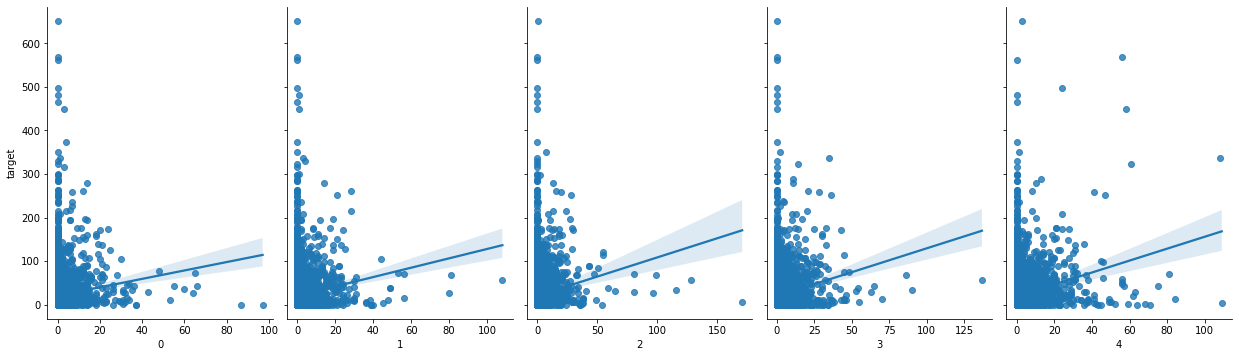

In [70]:
sns.pairplot(x_df, x_vars=[x for x in range(0,5)], y_vars='target', height=5, aspect=0.7, kind='reg')

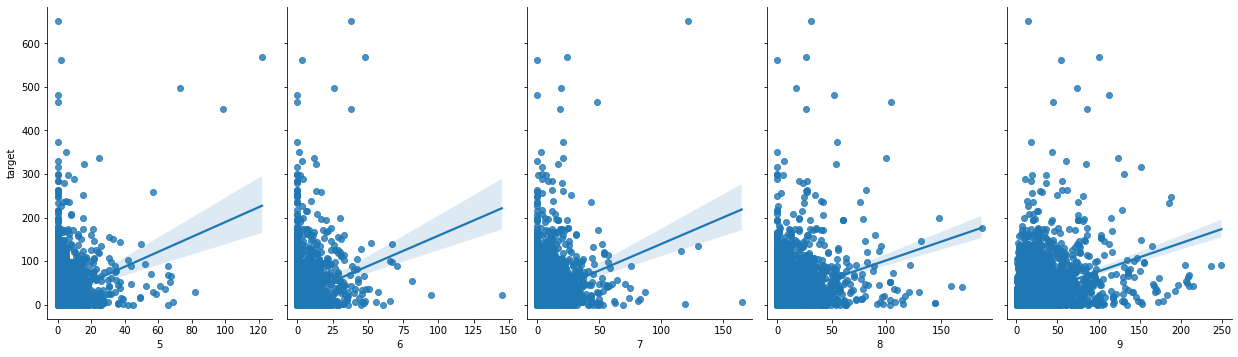

In [72]:
sns.pairplot(x_df, x_vars=[x for x in range(5,10)], y_vars='target', height=5, aspect=0.7, kind='reg')

In [78]:
# Illustrate poor r^2 score.
model.score(x_val, y_val)

0.1182906361538354